In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra

Para una carga puntual en movimiento, los potenciales de Liénard-Wiechert son
$$\phi(\vec{r};t)={\frac{1}{4\pi\epsilon_0}}{\frac{qc}{c|{\vec{r}-\vec{r}\ '}|-(\vec{r}-\vec{r}\ ')\cdot\vec{v}}},$$


$$\vec{A}(\vec{r};t)={\frac{\mu_0}{\pi}}{\frac{qc\vec{v}}{c|{\vec{r}-\vec{r}\ '}|-(\vec{r}-\vec{r}\ ')\cdot\vec{v}}}={\frac{\vec{v}}{c^2}}\phi(\vec{r};t) $$


Definimos nuestros paramétros

In [2]:
w1(t)=[3*cos(3*t),3*t^2,0]
v1(t)=[-9*sin(3*t),6t,0]

v1 (generic function with 1 method)

In [3]:
function φ(r,q,tiempo,w,v)
    c=299792458
    ϵ=8.85e-12
    potencial=zeros(length(tiempo))
    for i in 1:length(tiempo)
        constante=(q*c)/(4*π*ϵ)
        t=tiempo[i]
        rp=w(t)
        vel=v(t)
        A=((r[1]-rp[1])^2+(r[2]-rp[2])^2+(r[3]-rp[3])^2)^(1/2)
        B=(r.-rp)
        C=B[1]*vel[1]+B[2]*vel[2]+B[3]*vel[3]
        potencial[i]=constante*(1/((c*A)-C))
    end
    return potencial
end

φ (generic function with 1 method)

In [4]:
function A(r,q,tiempo,w,v)
    P=zeros(length(tiempo))
    μ=4e-7
    for i in 1:length(tiempo)
        P[i]=(μ)φ(r,q,tiempo,w,v)[i]
    end
    return P
end 

A (generic function with 1 method)

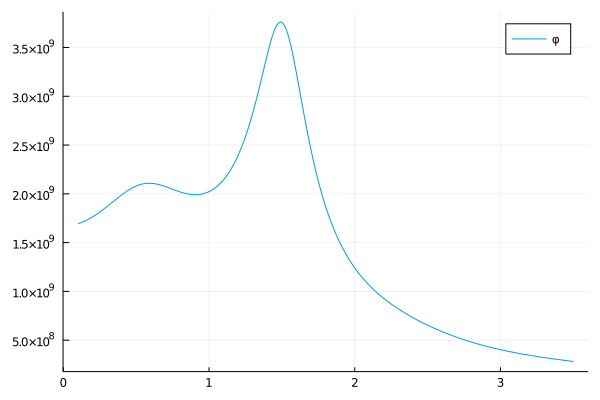

In [8]:
tiempo=collect(0.1:0.01:3.5)
#plot(title="Potenciales",xlabel="Tiempo [s]",ylabel="φ[V]")
plot(tiempo,φ([1,5,0],1,tiempo,w1,v1),label="φ")

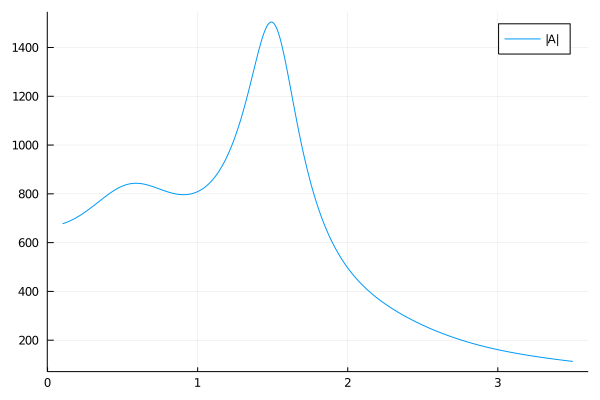

In [10]:
plot(tiempo,A([1,5,0],1,tiempo,w1,v1),label="|A|")